# Read Stroke data

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import PolynomialFeatures
import plotly.express as px
%matplotlib inline

In [22]:
import statsmodels.formula.api as smf

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix

In [12]:
df = pd.read_csv("stroke_data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [13]:
for col in df:
    if df[col].isnull().values.any():
        print(col)

bmi


In [17]:
mean_bmi = df['bmi'].mean()
df['bmi'].fillna(mean_bmi, inplace=True)

In [18]:
df.isnull().any()

id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                  False
smoking_status       False
stroke               False
dtype: bool

In [19]:
df.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.002999,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.325942,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.160189,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.038899,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.168751,0.131945
bmi,0.002999,0.325942,0.160189,0.038899,0.168751,1.000000,0.038947
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.038947,1.000000


In [27]:
# somewhat correlated features

df['age_bmi'] = df['age']*df['bmi']
df['age_hypertension'] = df['age']*df['hypertension']
df['age_heart_disease'] = df['age']*df['heart_disease']
df['age_avg_glucose_level'] = df['age']*df['avg_glucose_level']

# df['age_bmi'] = df['age_bmi'].fillna(0)

In [26]:
# less correlated features

df['bmi_hypertension'] = df['bmi']*df['hypertension']
df['heart_disease_hypertension'] = df['heart_disease']*df['hypertension']
df['avg_glucose_level_hypertension'] = df['avg_glucose_level']*df['hypertension']

In [28]:
# least correlated features

df['bmi_heart_disease'] = df['bmi']*df['heart_disease']

In [29]:
scaler = StandardScaler()

df[['age_bmi', 'age_hypertension', 'age_heart_disease', 
    'age_avg_glucose_level', 'bmi_hypertension', 
    'heart_disease_hypertension', 'avg_glucose_level_hypertension',
   'bmi_heart_disease']] = scaler.fit_transform(df[['age_bmi', 'age_hypertension', 'age_heart_disease', 
                                                    'age_avg_glucose_level', 'bmi_hypertension', 
                                                    'heart_disease_hypertension', 'avg_glucose_level_hypertension',
                                                   'bmi_heart_disease']])

In [31]:
df.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,age_bmi,age_hypertension,age_heart_disease,age_avg_glucose_level,bmi_hypertension,heart_disease_hypertension,avg_glucose_level_hypertension,bmi_heart_disease
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.002999,0.006388,0.006505,0.004825,-0.000839,-0.002964,0.005966,0.024591,-0.002356,-0.003250
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.325942,0.245257,0.906973,0.313705,0.280372,0.744796,0.249138,0.136235,0.263395,0.255097
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.160189,0.127904,0.294964,0.972950,0.113138,0.289399,0.965463,0.342725,0.899018,0.112899
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.038899,0.134914,0.230267,0.129711,0.985065,0.280048,0.096290,0.471319,0.124485,0.985908
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.168751,0.131945,0.283698,0.186606,0.163552,0.787302,0.175612,0.112074,0.338749,0.165831
bmi,0.002999,0.325942,0.160189,0.038899,0.168751,1.000000,0.038947,0.647346,0.128354,0.031854,0.293767,0.243094,0.032987,0.153852,0.063480
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.038947,1.000000,0.213873,0.149634,0.142783,0.246558,0.111890,0.080763,0.130930,0.135035
age_bmi,0.006505,0.906973,0.294964,0.230267,0.283698,0.647346,0.213873,1.000000,0.316083,0.240542,0.721140,0.312536,0.128367,0.289187,0.238963
age_hypertension,0.004825,0.313705,0.972950,0.129711,0.186606,0.128354,0.149634,0.316083,1.000000,0.138853,0.324001,0.918239,0.382917,0.892466,0.132467
age_heart_disease,-0.000839,0.280372,0.113138,0.985065,0.163552,0.031854,0.142783,0.240542,0.138853,1.000000,0.293440,0.098982,0.481480,0.128534,0.963986


# data clean func

In [56]:
# function for processing the df to give it new features
# copy the function to run it on cleaned df

def process(df):
    # This is where you can do all your processing

    df['age_bmi'] = df['age']*df['bmi']
    df['age_hypertension'] = df['age']*df['hypertension']
    df['age_heart_disease'] = df['age']*df['heart_disease']
    df['age_avg_glucose_level'] = df['age']*df['avg_glucose_level']
    
    df['bmi_hypertension'] = df['bmi']*df['hypertension']
    df['heart_disease_hypertension'] = df['heart_disease']*df['hypertension']
    df['avg_glucose_level_hypertension'] = df['avg_glucose_level']*df['hypertension']
    
    df['bmi_heart_disease'] = df['bmi']*df['heart_disease']
    
    df[['age_bmi', 'age_hypertension', 'age_heart_disease', 
    'age_avg_glucose_level', 'bmi_hypertension', 
    'heart_disease_hypertension', 'avg_glucose_level_hypertension',
   'bmi_heart_disease']] = scaler.fit_transform(df[['age_bmi', 'age_hypertension', 'age_heart_disease', 
                                                    'age_avg_glucose_level', 'bmi_hypertension', 
                                                    'heart_disease_hypertension', 'avg_glucose_level_hypertension',
                                                   'bmi_heart_disease']])

    return df

# new features summary

In [32]:
model_all = smf.ols(formula='stroke ~ age + hypertension + heart_disease + avg_glucose_level + bmi', data=df).fit()
model_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 stroke   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     83.32
Date:                Fri, 29 Apr 2022   Prob (F-statistic):           2.24e-84
Time:                        00:42:17   Log-Likelihood:                 797.26
No. Observations:                5110   AIC:                            -1583.
Df Residuals:                    5104   BIC:                            -1543.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0379      0.013     -3.023      0.003      -0.063      -0.013
age                   0.0020      0.000     13.964      0.000       0.002       0.002
hypertension          0.0425      0.010      4.143      0.000       0.022       0.063
heart_disease         0.0601      0.013      4.483      0.000       0.034       0.086
avg_glucose_level     0.0003    6.7e-05      4.955      0.000       0.000       0.000
bmi                  -0.0015      0.000     -3.776      0.000      -0.002      -0.001
==============================================================================
Omnibus:                     3851.954   Durbin-Watson:                   0.153
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            49183.318
Skew:                           3.706   Prob(JB):                         0.00
Kurtosis:                      16.269   Cond. No.                         590.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
model_newf = smf.ols(formula='stroke ~ age_bmi + age_hypertension + age_heart_disease + age_avg_glucose_level + bmi_hypertension + heart_disease_hypertension + avg_glucose_level_hypertension + bmi_heart_disease', data=df).fit()
model_newf.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 stroke   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     53.39
Date:                Fri, 29 Apr 2022   Prob (F-statistic):           1.10e-83
Time:                        00:43:33   Log-Likelihood:                 802.25
No. Observations:                5110   AIC:                            -1586.
Df Residuals:                    5101   BIC:                            -1528.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          0.0487      0.003     16.828      0.000       0.043       0.054
age_bmi                            0.0113      0.005      2.505      0.012       0.002       0.020
age_hypertension                   0.0535      0.008      6.307      0.000       0.037       0.070
age_heart_disease                  0.0158      0.011      1.422      0.155      -0.006       0.037
age_avg_glucose_level              0.0373      0.005      7.721      0.000       0.028       0.047
bmi_hypertension                  -0.0227      0.008     -2.782      0.005      -0.039      -0.007
heart_disease_hypertension        -0.0050      0.004     -1.393      0.164      -0.012       0.002
avg_glucose_level_hypertension    -0.0185      0.008     -2.441      0.015      -0.033      -0.004
bmi_heart_disease                  0.0010      0.011      0.089      0.929      -0.021       0.023
==============================================================================
Omnibus:                     3863.847   Durbin-Watson:                   0.157
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            50382.786
Skew:                           3.712   Prob(JB):                         0.00
Kurtosis:                      16.473   Cond. No.                         10.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
def smf_models(df, feature_name):
    model = smf.ols(formula='stroke ~ ' + feature_name + ' + I(' + feature_name + '**2) + I(' + feature_name + '**3)', data=df).fit()
    
    # uncomment below to get summary as output too
    # model.summary()
    
    # print r squared values
    print('R squared for ' + feature_name + '^3: ', model.rsquared, "\n",)

    # Add subplots with sns
    sns.kdeplot(df.loc[df['stroke'] == 1][feature_name], label='Stroke', shade=True)
    sns.kdeplot(df.loc[df['stroke'] == 0][feature_name], label='No Stroke', shade=True)
    sns.kdeplot().set(title=feature_name + '^3')

R squared for age_bmi^3:  0.05420096650532935 



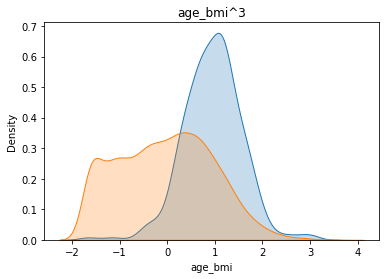

In [53]:
smf_models(df, 'age_bmi')

R squared for bmi_heart_disease^3:  0.018927921566349037 



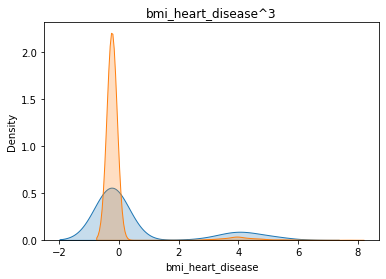

In [55]:
smf_models(df, 'bmi_heart_disease')

In [ ]:
# similar analysis done in data processing, try out when need

In [58]:
df_washed = pd.read_csv("Washeddata.csv")
df_washed.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67,0,1,1,4,1,228.69,36.600000,1,1
1,0,61,0,0,1,3,0,202.21,28.893237,0,1
2,1,80,0,1,1,4,0,105.92,32.500000,0,1
3,0,49,0,0,1,4,1,171.23,34.400000,2,1
4,0,79,1,0,1,3,0,174.12,24.000000,0,1


In [60]:
df_washed_newf = process(df)

In [61]:
df_washed_newf.to_csv("washed_newfeatures.csv")

# future works..